In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
import sklearn
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn import metrics
from sklearn.linear_model import Lasso
lasso=Lasso()
from sklearn.linear_model import Ridge
rd=Ridge()

In [2]:
import pandas as pd
data=pd.read_csv(r"E:\PythonDatasets\prjt\New folder\car_prices1.csv")
data

,year,make,model,trim,body,transmission,condition,odometer,color,interior,mmr,sellingprice
0,2015,Kia,Sorento,LX,SUV,automatic,5.0,16639.0,white,black,20500.0,21500.0
1,2015,Kia,Sorento,LX,SUV,automatic,5.0,9393.0,white,beige,20800.0,21500.0
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,45.0,1331.0,gray,black,31900.0,30000.0
3,2015,Volvo,S60,T5,Sedan,automatic,41.0,14282.0,white,black,27500.0,27750.0
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,43.0,2641.0,gray,black,66000.0,67000.0
...,...,...,...,...,...,...,...,...,...,...,...,...
498503,2015,Kia,K900,Luxury,Sedan,manual,45.0,18255.0,silver,black,35300.0,33000.0
498504,2012,Ram,2500,Power Wagon,Crew Cab,automatic,5.0,54393.0,white,black,30200.0,30800.0
498505,2012,BMW,X5,xDrive35d,SUV,automatic,48.0,50561.0,black,black,29800.0,34000.0
498506,2015,Nissan,Altima,2.5 S,sedan,automatic,38.0,16658.0,white,black,15100.0,11100.0


In [3]:
data.head()

,year,make,model,trim,body,transmission,condition,odometer,color,interior,mmr,sellingprice
0,2015,Kia,Sorento,LX,SUV,automatic,5.0,16639.0,white,black,20500.0,21500.0
1,2015,Kia,Sorento,LX,SUV,automatic,5.0,9393.0,white,beige,20800.0,21500.0
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,45.0,1331.0,gray,black,31900.0,30000.0
3,2015,Volvo,S60,T5,Sedan,automatic,41.0,14282.0,white,black,27500.0,27750.0
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,43.0,2641.0,gray,black,66000.0,67000.0


In [4]:
data.tail()

,year,make,model,trim,body,transmission,condition,odometer,color,interior,mmr,sellingprice
498503,2015,Kia,K900,Luxury,Sedan,manual,45.0,18255.0,silver,black,35300.0,33000.0
498504,2012,Ram,2500,Power Wagon,Crew Cab,automatic,5.0,54393.0,white,black,30200.0,30800.0
498505,2012,BMW,X5,xDrive35d,SUV,automatic,48.0,50561.0,black,black,29800.0,34000.0
498506,2015,Nissan,Altima,2.5 S,sedan,automatic,38.0,16658.0,white,black,15100.0,11100.0
498507,2014,Ford,F-150,XLT,SuperCrew,automatic,34.0,15008.0,gray,gray,29600.0,26700.0


In [5]:
data.describe()

,year,condition,odometer,mmr,sellingprice
count,498508.000000,498508.000000,498484.000000,498508.000000,498508.000000
mean,2010.168647,30.700749,67065.634913,13858.094203,13708.634925
std,3.834421,13.291093,52229.002100,9528.784087,9602.079012
min,1990.000000,1.000000,1.000000,25.000000,1.000000
25%,2008.000000,24.000000,28350.000000,7425.000000,7200.000000
50%,2012.000000,35.000000,51416.000000,12350.000000,12250.000000
75%,2013.000000,41.000000,96951.250000,18350.000000,18200.000000
max,2015.000000,49.000000,999999.000000,182000.000000,230000.000000


In [6]:
data.describe(include="all")

,year,make,model,trim,body,transmission,condition,odometer,color,interior,mmr,sellingprice
count,498508.000000,498508,498508,498508,498508,498508,498508.000000,498484.000000,497875,497875,498508.000000,498508.000000
unique,NaN,53,768,1505,85,2,NaN,NaN,19,16,NaN,NaN
top,NaN,Ford,Altima,Base,Sedan,automatic,NaN,NaN,black,black,NaN,NaN
freq,NaN,80611,17671,50581,181180,425499,NaN,NaN,104475,226783,NaN,NaN
mean,2010.168647,NaN,NaN,NaN,NaN,NaN,30.700749,67065.634913,NaN,NaN,13858.094203,13708.634925
std,3.834421,NaN,NaN,NaN,NaN,NaN,13.291093,52229.002100,NaN,NaN,9528.784087,9602.079012
min,1990.000000,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000,NaN,NaN,25.000000,1.000000
25%,2008.000000,NaN,NaN,NaN,NaN,NaN,24.000000,28350.000000,NaN,NaN,7425.000000,7200.000000
50%,2012.000000,NaN,NaN,NaN,NaN,NaN,35.000000,51416.000000,NaN,NaN,12350.000000,12250.000000
75%,2013.000000,NaN,NaN,NaN,NaN,NaN,41.000000,96951.250000,NaN,NaN,18350.000000,18200.000000


In [7]:
data.dtypes

year              int64
make             object
model            object
trim             object
body             object
transmission     object
condition       float64
odometer        float64
color            object
interior         object
mmr             float64
sellingprice    float64
dtype: object

In [8]:
data.shape

(498508, 12)

In [9]:
data.isnull().sum()

year              0
make              0
model             0
trim              0
body              0
transmission      0
condition         0
odometer         24
color           633
interior        633
mmr               0
sellingprice      0
dtype: int64

# Null Values Treatment

In [10]:
data=data.drop(["year"],axis=1)

In [11]:
data.odometer.value_counts()

odometer
1.0         1000
999999.0      64
10.0          28
21587.0       20
8.0           18
            ... 
1568.0         1
100249.0       1
173622.0       1
197318.0       1
74996.0        1
Name: count, Length: 163809, dtype: int64

In [12]:
data=data.dropna(subset=["odometer"])

In [13]:
data.color.value_counts()

color
black        104469
white         99311
gray          78404
silver        77838
blue          47304
red           40653
gold          10159
green         10059
beige          8401
burgundy       8319
brown          6325
orange         1879
purple         1452
off-white      1384
yellow         1171
charcoal        460
turquoise       213
pink             38
lime             13
Name: count, dtype: int64

In [14]:
data.color=data.color.fillna("lime")

In [15]:
data.interior.value_counts()

interior
black        226776
gray         163815
beige         55086
tan           39463
brown          7797
red            1215
silver         1021
blue            994
off-white       336
purple          307
gold            287
white           224
green           214
burgundy        169
orange          129
yellow           19
Name: count, dtype: int64

In [16]:
data.interior=data.interior.fillna("yellow")

In [17]:
data.isnull().sum()

make            0
model           0
trim            0
body            0
transmission    0
condition       0
odometer        0
color           0
interior        0
mmr             0
sellingprice    0
dtype: int64

In [18]:
data.shape

(498484, 11)

In [19]:
data.drop_duplicates(inplace=True)

In [20]:
data.shape

(498484, 11)

In [21]:
data.dtypes

make             object
model            object
trim             object
body             object
transmission     object
condition       float64
odometer        float64
color            object
interior         object
mmr             float64
sellingprice    float64
dtype: object

# Data type Conversion

In [22]:
data.make=le.fit_transform(data.make)
data.model=le.fit_transform(data.model)
data.trim=le.fit_transform(data.trim)
data.body=le.fit_transform(data.body)
data.transmission=le.fit_transform(data.transmission)
data.color=le.fit_transform(data.color)
data.interior=le.fit_transform(data.interior)

In [23]:
data.dtypes

make              int32
model             int32
trim              int32
body              int32
transmission      int32
condition       float64
odometer        float64
color             int32
interior          int32
mmr             float64
sellingprice    float64
dtype: object

# Visualization

In [24]:
cor=data.corr()
cor

,make,model,trim,body,transmission,condition,odometer,color,interior,mmr,sellingprice
make,1.000000,0.048717,-0.079068,0.041241,0.031203,0.034514,-0.020998,-0.004316,0.003137,-0.065255,-0.062990
model,0.048717,1.000000,0.124585,-0.008037,0.025798,-0.015963,0.052599,0.006349,0.020028,0.005130,0.005492
trim,-0.079068,0.124585,1.000000,-0.013617,-0.003860,0.004327,-0.020219,0.020351,0.015742,0.039135,0.036973
body,0.041241,-0.008037,-0.013617,1.000000,0.003570,0.021824,-0.015993,-0.002286,-0.003833,-0.031385,-0.028742
transmission,0.031203,0.025798,-0.003860,0.003570,1.000000,0.006330,-0.011923,-0.015650,-0.039009,0.030543,0.028175
condition,0.034514,-0.015963,0.004327,0.021824,0.006330,1.000000,-0.306243,0.016620,-0.063582,0.270830,0.311716
odometer,-0.020998,0.052599,-0.020219,-0.015993,-0.011923,-0.306243,1.000000,-0.005010,0.173142,-0.581835,-0.576573
color,-0.004316,0.006349,0.020351,-0.002286,-0.015650,0.016620,-0.005010,1.000000,0.037179,-0.021580,-0.015284
interior,0.003137,0.020028,0.015742,-0.003833,-0.039009,-0.063582,0.173142,0.037179,1.000000,-0.138322,-0.136817
mmr,-0.065255,0.005130,0.039135,-0.031385,0.030543,0.270830,-0.581835,-0.021580,-0.138322,1.000000,0.983731


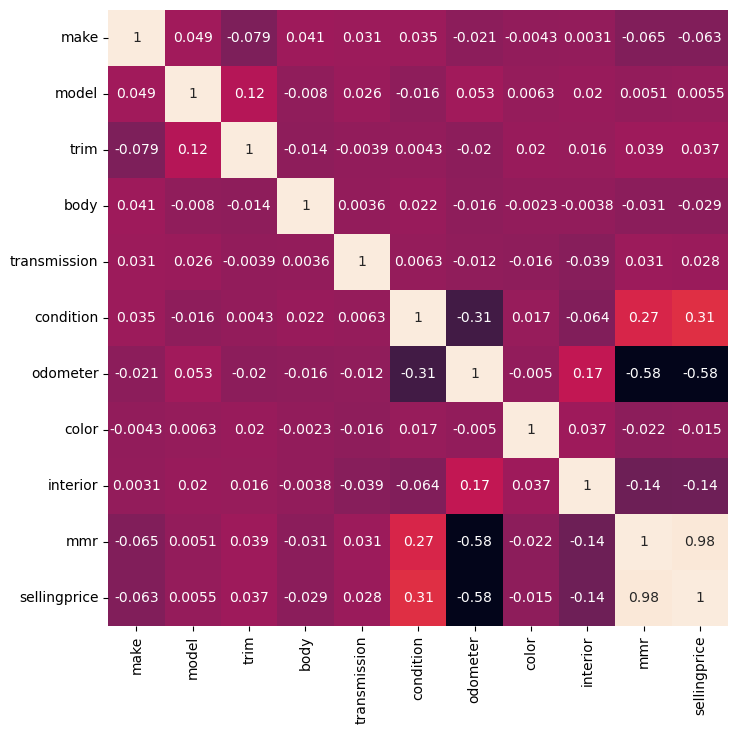

In [25]:
import matplotlib.pyplot as plt 
plt.figure(figsize=(8, 8)) 
sns.heatmap(data.corr() , 
           annot=True, 
           cbar=False) 
plt.show()

In [26]:
#The aboove heat map shows the correlated data for our dataset

<Axes: xlabel='mmr', ylabel='sellingprice'>

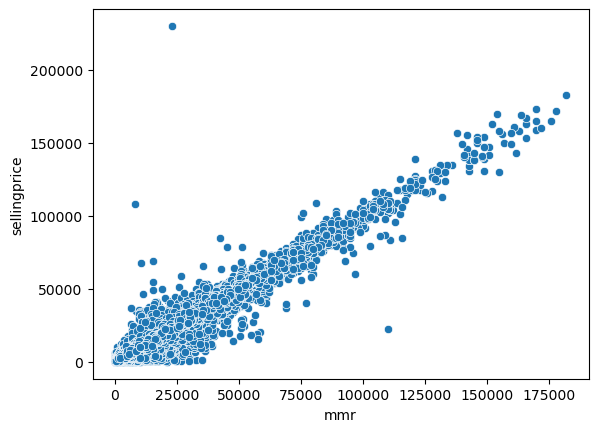

In [27]:
sns.scatterplot(x="mmr",y="sellingprice",sizes=(50,200),data=data)

In [28]:
#The above graph represents the scatterplot between mmr and selling price

<Axes: xlabel='mmr', ylabel='sellingprice'>

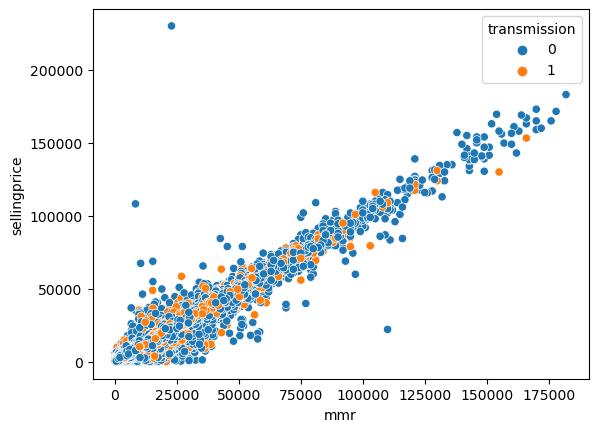

In [29]:
sns.scatterplot(x="mmr",y="sellingprice",hue="transmission",sizes=(50,200),data=data)

In [30]:
#The above graph represents the scatterplot between mmr and selling price with respect to transmission

<Axes: title={'center': 'Distribution of odometer'}, ylabel='Frequency'>

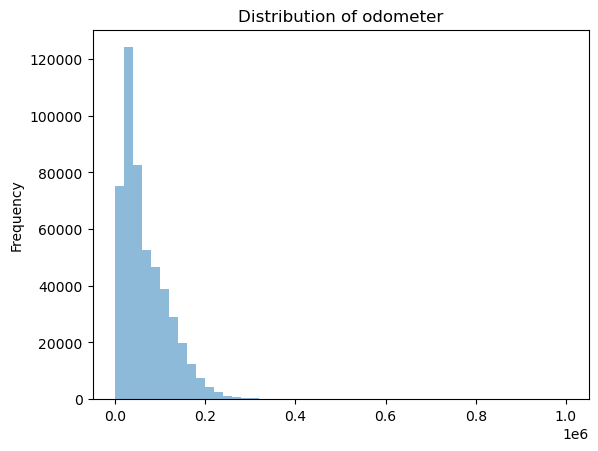

In [31]:
data['odometer'].plot.hist(bins=50,alpha=0.5,title='Distribution of odometer')

In [32]:
#The above graph represents the hist graph for the distribution of values in odometer in our dataset

# Model Building Before Outliers

In [33]:
x=data.iloc[:,:-1]
y=data.iloc[:,-1]

In [34]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=101)

In [35]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((398787, 10), (99697, 10), (398787,), (99697,))

# Lin

In [36]:
lin=linear_model.LinearRegression()

In [37]:
lin.fit(x_train,y_train)

LinearRegression()

In [38]:
p1=lin.predict(x_test)
p1

array([ 4366.2443818 ,  2468.52379096, 56689.57841783, ...,
       14459.6916486 , 11924.89076116, 17880.59161424])

In [39]:
lin.intercept_

-1091.7166596420375

In [40]:
lin.coef_

array([-8.20382983e-01,  6.22504217e-02, -4.03100553e-02,  4.93197704e-01,
       -4.59574881e+01,  3.57088205e+01,  8.70977206e-04,  7.68686474e+00,
       -1.52042091e-01,  9.80949183e-01])

In [41]:
r2=lin.score(x_train,y_train)
r2

0.9696572390256346

In [42]:
adj_r2=1-(((1-r2)*(398787-1))/(398787-11-1))
adj_r2

0.9696564020364283

In [43]:
mse=metrics.mean_squared_error(y_test,p1)
mse

2573991.5550686168

In [44]:
rmse=pow(mse,0.5)
rmse

1604.3664029979614

In [45]:
df1=pd.DataFrame({"Actual":y_test,"Predicted":p1})

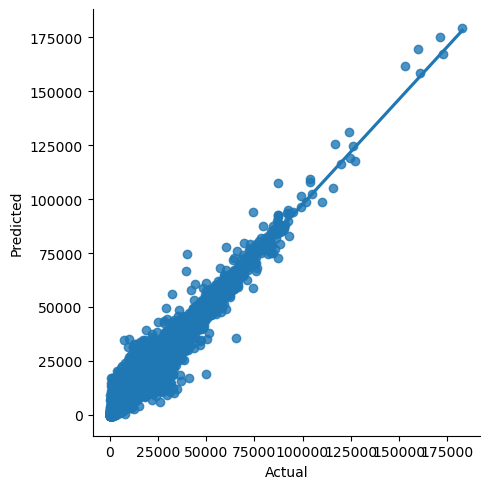

In [46]:
sns.lmplot(data=df1,x="Actual",y="Predicted")

# Lasso

In [47]:
lasso.fit(x_train,y_train)

Lasso()

In [48]:
p2=lasso.predict(x_test)
p2

array([ 4365.70994142,  2467.70241194, 56688.19265304, ...,
       14458.52585553, 11923.69513327, 17888.44671273])

In [49]:
lasso.coef_

array([-8.21598079e-01,  6.18590733e-02, -4.02615130e-02,  4.89556562e-01,
       -3.79109811e+01,  3.57031317e+01,  8.69214702e-04,  7.66806811e+00,
       -4.85289762e-02,  9.80941079e-01])

In [50]:
df2=pd.DataFrame({"Importances":list(lasso.coef_),"Columns":list(x)})
df2

,Importances,Columns
0,-0.821598,make
1,0.061859,model
2,-0.040262,trim
3,0.489557,body
4,-37.910981,transmission
5,35.703132,condition
6,0.000869,odometer
7,7.668068,color
8,-0.048529,interior
9,0.980941,mmr


In [51]:
lr2=lasso.score(x_train,y_train)
lr2

0.9696571508931938

In [52]:
adjlr2=1-(((1-lr2)*(398787-1))/(398787-11-1))
adjlr2

0.9696563139015565

In [53]:
result=pd.DataFrame({"actual":y_test,"predicted":p2})
result

,actual,predicted
166985,4900.0,4365.709941
151520,1550.0,2467.702412
355434,58800.0,56688.192653
417750,6200.0,6048.650199
284523,76750.0,76166.568609
...,...,...
249288,11750.0,10840.250268
484763,16600.0,17937.461875
123051,14800.0,14458.525856
141848,12700.0,11923.695133


In [54]:
mse1=metrics.mean_squared_error(y_test,p2)
mse1

2574011.021669549

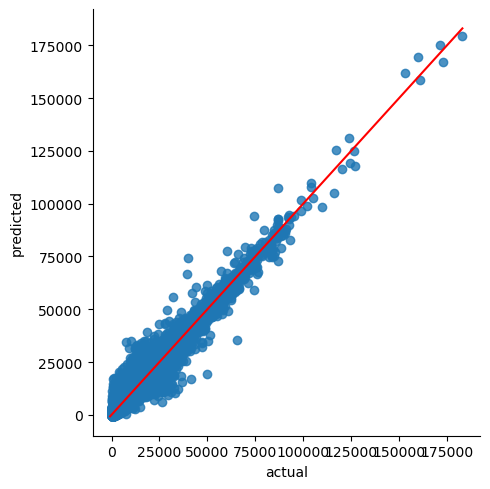

In [55]:
sns.lmplot(x="actual",y="predicted",data=result,fit_reg=False)
d_line=np.arange(result.min().min(),result.max().max())
plt.plot(d_line,d_line,color="red",linestyle="-")

# Ridge

In [56]:
rd.fit(x_train,y_train)

Ridge()

In [57]:
p3=rd.predict(x_test)
p3

array([ 4366.24428718,  2468.52368624, 56689.57824579, ...,
       14459.69152162, 11924.89063327, 17880.5924287 ])

In [58]:
list(rd.coef_)

[-0.8203836954179985,
 0.06225038343048827,
 -0.04031005155510316,
 0.49319765533808735,
 -45.956562750813,
 35.7088199990914,
 0.0008709770962222941,
 7.6868650446853595,
 -0.1520388392536831,
 0.9809491818018725]

In [59]:
d1=pd.DataFrame({"Coeff":list(rd.coef_),"columns":list(x)})
d1

,Coeff,columns
0,-0.820384,make
1,0.062250,model
2,-0.040310,trim
3,0.493198,body
4,-45.956563,transmission
5,35.708820,condition
6,0.000871,odometer
7,7.686865,color
8,-0.152039,interior
9,0.980949,mmr


In [60]:
rdr2=rd.score(x_train,y_train)
rdr2

0.9696572390256334

In [61]:
rda_r2=1-(((1-rdr2)*(398787-1))/(398787-11-1))
rda_r2

0.9696564020364271

In [62]:
mse2=metrics.mean_squared_error(y_test,p3)
mse2

2573991.556573496

# RF-Regressor

In [63]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()

In [64]:
rf.fit(x_train,y_train)

RandomForestRegressor()

In [65]:
p4=rf.predict(x_test)

In [66]:
rf_r2=rf.score(x_train,y_train)
rf_r2

0.9963417106914856

In [67]:
rf_adjr2=1-(((1-rf_r2)*(398787-1))/(398787-11-1))
rf_adjr2

0.9963416097794866

In [68]:
rf_MSE=metrics.mean_squared_error(y_test,p4)
rf_MSE

2276011.0080952197

# DT Regressor

In [69]:
from sklearn.tree import DecisionTreeRegressor
dt=DecisionTreeRegressor()

In [70]:
dt.fit(x_train,y_train)

DecisionTreeRegressor()

In [71]:
p5=dt.predict(x_test)

In [72]:
dt_r2=dt.score(x_train,y_train)
dt_r2

0.9999997570369441

In [73]:
dt_adjr2=1-(((1-dt_r2)*(398787-1))/(398787-11-1))
dt_adjr2

0.9999997570302421

In [74]:
dt_MSE=metrics.mean_squared_error(y_test,p5)
dt_MSE

5275281.832853546

# XGB Regressor

In [75]:
from xgboost import XGBRegressor
xgbr=XGBRegressor()

In [76]:
xgbr.fit(x_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [77]:
p6=xgbr.predict(x_test)

In [78]:
xgb_r2=xgbr.score(x_train,y_train)
xgb_r2

0.9768935336940331

In [79]:
xgb_adjr2=1-(((1-xgb_r2)*(398787-1))/(398787-11-1))
xgb_adjr2

0.976892896314234

In [80]:
xgb_MSE=metrics.mean_squared_error(y_test,p6)
xgb_MSE

2518358.605039214

In [81]:
l1=["Linear","Lasso","Ridge","RF-Regressor","DT Regressor","XGB Regressor"]
l2=[r2,lr2,rdr2,rf_r2,dt_r2,xgb_r2]
l3=[adj_r2,adjlr2,rda_r2,rf_adjr2,dt_adjr2,xgb_adjr2]
l4=[mse,mse1,mse2,rf_MSE,dt_MSE,xgb_MSE]

In [82]:
final=pd.DataFrame({"Modelname":l1,"R-square":l2,"Adj-R2":l3,"MSE":l4})
final

,Modelname,R-square,Adj-R2,MSE
0,Linear,0.969657,0.969656,2.573992e+06
1,Lasso,0.969657,0.969656,2.574011e+06
2,Ridge,0.969657,0.969656,2.573992e+06
3,RF-Regressor,0.996342,0.996342,2.276011e+06
4,DT Regressor,1.000000,1.000000,5.275282e+06
5,XGB Regressor,0.976894,0.976893,2.518359e+06


# Outliers Treatment

<Axes: ylabel='condition'>

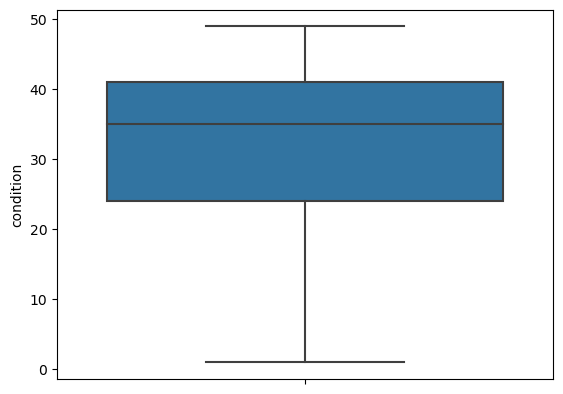

In [83]:
sns.boxplot(data=data,y="condition")

<Axes: ylabel='odometer'>

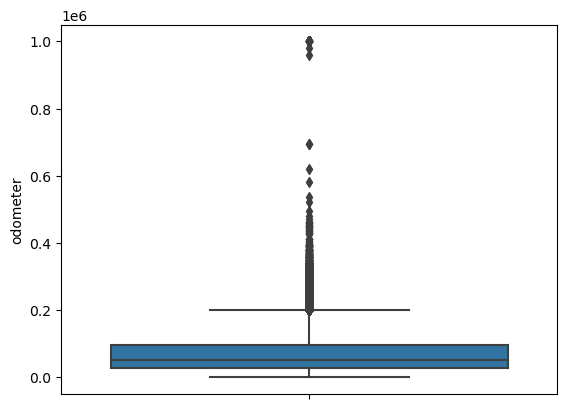

In [84]:
sns.boxplot(data=data,y="odometer")

<Axes: xlabel='odometer', ylabel='Density'>

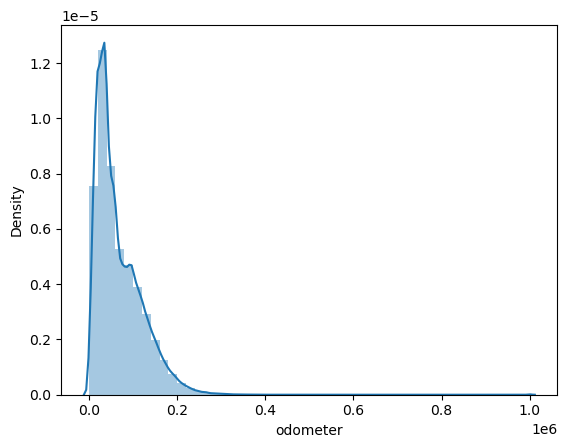

In [85]:
sns.distplot(data["odometer"])

In [86]:
IQR=data["odometer"].quantile(0.75)-data["odometer"].quantile(0.25)
IQR

68601.25

In [87]:
lb1=data["odometer"].quantile(0.25)-(IQR*3)
ub1=data["odometer"].quantile(0.75)+(IQR*3)
print(lb1,ub1)

-177453.75 302755.0


In [88]:
data.loc[data["odometer"]>302755.0,"odometer"]=302755.0

<Axes: xlabel='odometer', ylabel='Density'>

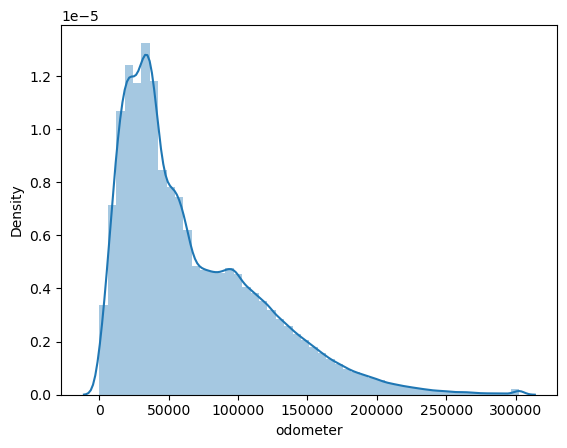

In [89]:
sns.distplot(data["odometer"])

<Axes: ylabel='mmr'>

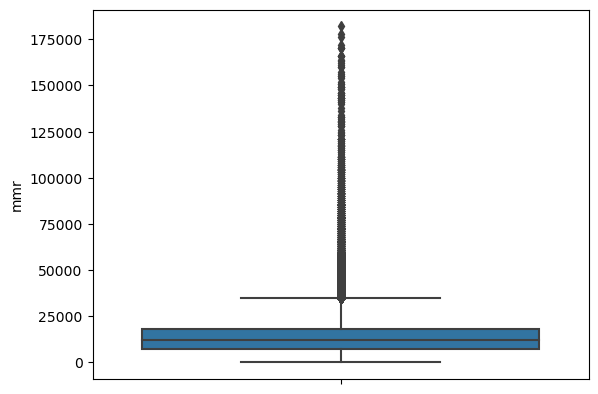

In [90]:
sns.boxplot(data=data,y="mmr")

<Axes: xlabel='mmr', ylabel='Density'>

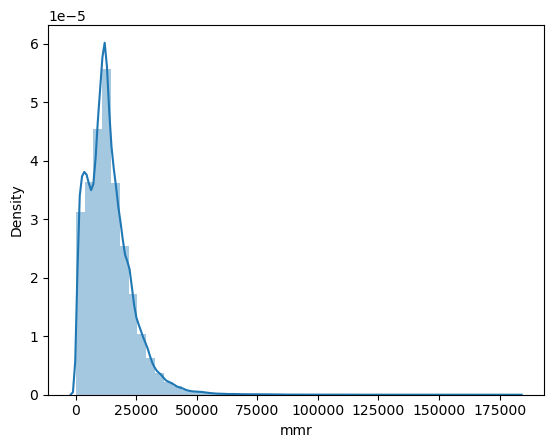

In [91]:
sns.distplot(data["mmr"])

In [92]:
IQR=data["mmr"].quantile(0.75)-data["mmr"].quantile(0.25)
IQR

10925.0

In [93]:
lb1=data["mmr"].quantile(0.25)-(IQR*3)
ub1=data["mmr"].quantile(0.75)+(IQR*3)
print(lb1,ub1)

-25350.0 51125.0


In [94]:
data.loc[data["mmr"]>51125.0,"mmr"]=51125.0

<Axes: xlabel='mmr', ylabel='Density'>

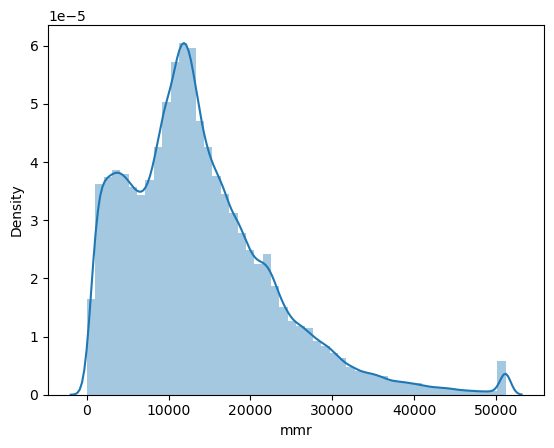

In [95]:
sns.distplot(data["mmr"])

# Skewness

In [96]:
data.skew()

make            0.604002
model           0.258506
trim           -0.208851
body            1.105014
transmission    1.999945
condition      -0.836788
odometer        1.194717
color          -0.009056
interior        1.186278
mmr             1.152925
sellingprice    1.980974
dtype: float64

In [97]:
data["odometer"]=np.sqrt(data["odometer"])

In [98]:
data["mmr"]=np.sqrt(data["mmr"])

In [99]:
data.skew()

make            0.604002
model           0.258506
trim           -0.208851
body            1.105014
transmission    1.999945
condition      -0.836788
odometer        0.379389
color          -0.009056
interior        1.186278
mmr             0.107570
sellingprice    1.980974
dtype: float64

# Model Building

In [100]:
x1=data.iloc[:,:-1]
y1=data.iloc[:,-1]

In [101]:
x1_train,x1_test,y1_train,y1_test=train_test_split(x1,y1,test_size=0.2,random_state=101)

In [102]:
x1_train.shape,x1_test.shape,y1_train.shape,y1_test.shape

((398787, 10), (99697, 10), (398787,), (99697,))

# Lin

In [103]:
lin=linear_model.LinearRegression()

In [104]:
lin.fit(x1_train,y1_train)

LinearRegression()

In [105]:
p7=lin.predict(x1_test)
p7

array([ 4933.69984578,   768.66523395, 41170.62638008, ...,
       15415.24651695, 13762.12623729, 19924.41037727])

In [106]:
lin.intercept_

-17015.64690714277

In [107]:
lin.coef_

array([  1.14297864,   0.31625356,  -0.25173097,  -1.47536529,
       148.36020059,  11.6784648 ,  11.08715063,   3.46322228,
        33.45979073, 249.66999818])

In [108]:
r22=lin.score(x1_train,y1_train)
r22

0.8707913422681361

In [109]:
adj_r22=1-(((1-r2)*(398787-1))/(398787-11-1))
adj_r22

0.9696564020364283

In [110]:
mse3=metrics.mean_squared_error(y_test,p7)
mse3

10719473.074320816

In [111]:
rmse3=pow(mse,0.5)
rmse3

1604.3664029979614

In [112]:
df11=pd.DataFrame({"Actual":y1_test,"Predicted":p4})

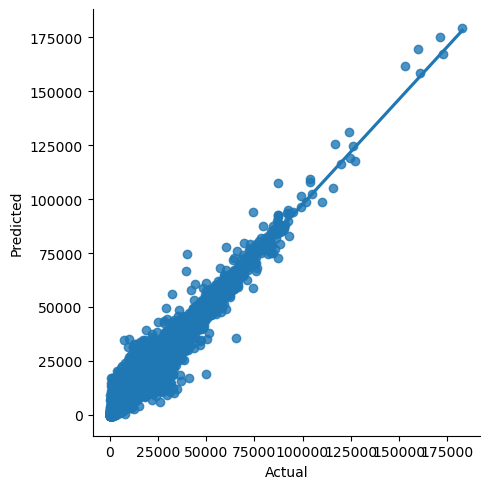

In [113]:
sns.lmplot(data=df1,x="Actual",y="Predicted")

# Lasso

In [114]:
lasso.fit(x1_train,y1_train)

Lasso()

In [115]:
p8=lasso.predict(x1_test)
p8

array([ 4934.96047693,   769.61211155, 41171.64034146, ...,
       15416.06532965, 13763.48418554, 19916.87174493])

In [116]:
lasso.coef_

array([  1.1439036 ,   0.31662713,  -0.25174494,  -1.47181649,
       140.30588773,  11.67213787,  11.08660951,   3.43404374,
        33.35944626, 249.66944003])

In [117]:
df21=pd.DataFrame({"Importances":list(lasso.coef_),"Columns":list(x1)})
df21

,Importances,Columns
0,1.143904,make
1,0.316627,model
2,-0.251745,trim
3,-1.471816,body
4,140.305888,transmission
5,11.672138,condition
6,11.086610,odometer
7,3.434044,color
8,33.359446,interior
9,249.669440,mmr


In [118]:
lr22=lasso.score(x1_train,y1_train)
lr22

0.8707912539611509

In [119]:
adjlr22=1-(((1-lr2)*(398787-1))/(398787-11-1))
adjlr22

0.9696563139015565

In [120]:
result2=pd.DataFrame({"actual":y1_test,"predicted":p8})
result2

,actual,predicted
166985,4900.0,4934.960477
151520,1550.0,769.612112
355434,58800.0,41171.640341
417750,6200.0,6355.433457
284523,76750.0,41373.268700
...,...,...
249288,11750.0,12782.536208
484763,16600.0,18334.696770
123051,14800.0,15416.065330
141848,12700.0,13763.484186


In [121]:
mse4=metrics.mean_squared_error(y1_test,p8)
mse4

10719423.423551243

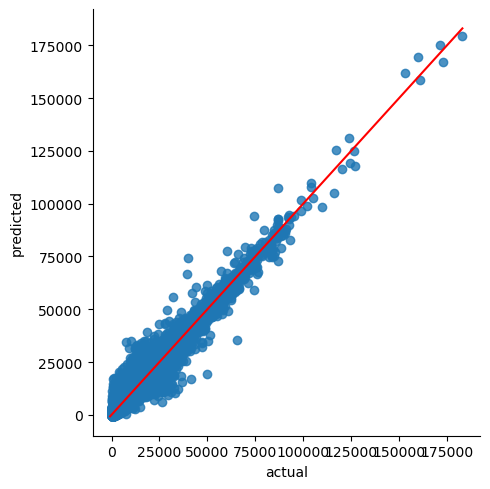

In [122]:
sns.lmplot(x="actual",y="predicted",data=result,fit_reg=False)
d_line=np.arange(result.min().min(),result.max().max())
plt.plot(d_line,d_line,color="red",linestyle="-")

# Ridge

In [123]:
rd.fit(x1_train,y1_train)

Ridge()

In [124]:
p9=rd.predict(x1_test)
p9

array([ 4933.70021531,   768.6655738 , 41170.62677551, ...,
       15415.24692311, 13762.12666292, 19924.40768852])

In [125]:
list(rd.coef_)

[1.1429807472945728,
 0.31625369328971137,
 -0.251730976397444,
 -1.4753652131614599,
 148.35721283723083,
 11.678464689841102,
 11.087150406958418,
 3.4632195984120533,
 33.459774032070584,
 249.66999789897338]

In [126]:
d2=pd.DataFrame({"Coeff":list(rd.coef_),"columns":list(x1)})
d2

,Coeff,columns
0,1.142981,make
1,0.316254,model
2,-0.251731,trim
3,-1.475365,body
4,148.357213,transmission
5,11.678465,condition
6,11.087150,odometer
7,3.463220,color
8,33.459774,interior
9,249.669998,mmr


In [127]:
rdr22=rd.score(x1_train,y1_train)
rdr22

0.8707913422681242

In [128]:
rda_r22=1-(((1-rdr2)*(398787-1))/(398787-11-1))
rda_r22

0.9696564020364271

In [129]:
mse5=metrics.mean_squared_error(y_test,p9)
mse5

10719473.052981077

# Adaboost Regressor

In [130]:
from sklearn.ensemble import AdaBoostRegressor
ab=AdaBoostRegressor()

In [131]:
ab.fit(x1_train,y1_train)

AdaBoostRegressor()

In [132]:
p11=ab.predict(x1_test)

In [133]:
ab_r22=ab.score(x1_train,y1_train)
ab_r22

0.6643758748953805

In [134]:
ab_adjr22=1-(((1-ab_r22)*(398787-1))/(398787-11-1))
ab_adjr22

0.6643666168792658

In [135]:
ab_MSE2=metrics.mean_squared_error(y1_test,p11)
ab_MSE2

30888230.532837514

# Gradient Boost Regressor

In [136]:
from sklearn.ensemble import GradientBoostingRegressor
gb=GradientBoostingRegressor()

In [137]:
gb.fit(x1_train,y1_train)

GradientBoostingRegressor()

In [138]:
p12=gb.predict(x1_test)

In [139]:
gb_r22=gb.score(x1_train,y1_train)
gb_r22

0.9595977246415608

In [140]:
gb_adjr22=1-(((1-gb_r22)*(398787-1))/(398787-11-1))
gb_adjr22

0.9595966101659067

In [141]:
gb_MSE2=metrics.mean_squared_error(y1_test,p12)
gb_MSE2

3338397.366721296

# RF-Regressor

In [142]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()

In [143]:
rf.fit(x1_train,y1_train)

RandomForestRegressor()

In [144]:
p13=rf.predict(x1_test)

In [145]:
rf_r22=rf.score(x1_train,y1_train)
rf_r22

0.9956808694167093

In [146]:
rf_adjr22=1-(((1-rf_r22)*(398787-1))/(398787-11-1))
rf_adjr22

0.9956807502757491

In [147]:
rf_MSE2=metrics.mean_squared_error(y1_test,p13)
rf_MSE2

2708978.2998778173

# XGB Regressor

In [148]:
from xgboost import XGBRegressor
xgbr=XGBRegressor()

In [149]:
xgbr.fit(x1_train,y1_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [150]:
p14=xgbr.predict(x1_test)

In [151]:
xgb_r22=xgbr.score(x1_train,y1_train)
xgb_r22

0.9742639889998655

In [152]:
xgb_adjr22=1-(((1-xgb_r22)*(398787-1))/(398787-11-1))
xgb_adjr22

0.9742632790854502

In [153]:
xgb_MSE2=metrics.mean_squared_error(y1_test,p14)
xgb_MSE2

2902613.8509471347

In [154]:
l1=["Linear","Lasso","Ridge","Adaboost Regressor","Gradient Boost Regressor","RF-Regressor","XGB Regressor"]
l2=[r22,lr22,rdr22,ab_r22,gb_r22,rf_r22,xgb_r22]
l3=[adj_r22,adjlr22,rda_r22,ab_adjr22,gb_adjr22,rf_adjr22,xgb_adjr22,]
l4=[mse3,mse4,mse5,ab_MSE2,gb_MSE2,rf_MSE2,xgb_MSE2]

In [155]:
final2=pd.DataFrame({"Modelname":l1,"R-square":l2,"Adj-R2":l3,"MSE":l4})
final2

,Modelname,R-square,Adj-R2,MSE
0,Linear,0.870791,0.969656,1.071947e+07
1,Lasso,0.870791,0.969656,1.071942e+07
2,Ridge,0.870791,0.969656,1.071947e+07
3,Adaboost Regressor,0.664376,0.664367,3.088823e+07
4,Gradient Boost Regressor,0.959598,0.959597,3.338397e+06
5,RF-Regressor,0.995681,0.995681,2.708978e+06
6,XGB Regressor,0.974264,0.974263,2.902614e+06


# Feature Selection

In [156]:
df21=pd.DataFrame({"Importances":list(lasso.coef_),"Columns":list(x1)})
df21

,Importances,Columns
0,1.143904,make
1,0.316627,model
2,-0.251745,trim
3,-1.471816,body
4,140.305888,transmission
5,11.672138,condition
6,11.086610,odometer
7,3.434044,color
8,33.359446,interior
9,249.669440,mmr


In [157]:
fs1=data.drop(["model","body"],axis=1)

In [158]:
x3=fs1.iloc[:,:-1]
y3=fs1.iloc[:,-1]

In [159]:
x3_tr,x3_te,y3_tr,y3_te=train_test_split(x3,y3,test_size=0.2,random_state=101)

In [160]:
x3_tr.shape,x3_te.shape,y3_tr.shape,y3_te.shape

((398787, 8), (99697, 8), (398787,), (99697,))

In [161]:
#Gradient Boost Regressor

In [162]:
gb.fit(x3_tr,y3_tr)

GradientBoostingRegressor()

In [163]:
p15=gb.predict(x3_te)

In [164]:
gb_r23=gb.score(x3_tr,y3_tr)
gb_r23

0.9592726704908041

In [165]:
gb_adjr23=1-(((1-gb_r23)*(398787-1))/(398787-9-1))
gb_adjr23

0.9592717513155117

In [166]:
gb_MSE3=metrics.mean_squared_error(y_test,p12)
gb_MSE3

3338397.366721296

In [167]:
#XGB Regressor

In [168]:
xgbr.fit(x3_tr,y3_tr)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [169]:
p14=xgbr.predict(x3_te)

In [170]:
xgb_r23=xgbr.score(x3_tr,y3_tr)
xgb_r23

0.9726352561526487

In [171]:
xgb_adjr23=1-(((1-xgb_r2)*(398787-1))/(398787-9-1))
xgb_adjr23

0.9768930122040856

In [172]:
xgb_MSE2=metrics.mean_squared_error(y3_te,p14)
xgb_MSE2

2904997.4882626873

In [173]:
l1=["Linear","Lasso","Ridge","Adaboost Regressor","Gradient Boost Regressor","RF-Regressor","XGB Regressor","Feature Gradient Boost Regressor","Feature XGB Regressor"]
l2=[r22,lr22,rdr22,ab_r22,gb_r22,rf_r22,xgb_r22,gb_r23,xgb_r23]
l3=[adj_r22,adjlr22,rda_r22,ab_adjr22,gb_adjr22,rf_adjr22,xgb_adjr22,gb_adjr23,xgb_adjr23]
l4=[mse3,mse4,mse5,ab_MSE2,gb_MSE2,rf_MSE2,xgb_MSE2,gb_MSE3,xgb_MSE2]

In [174]:
final2=pd.DataFrame({"Modelname":l1,"R-square":l2,"Adj-R2":l3,"MSE":l4})
final2

,Modelname,R-square,Adj-R2,MSE
0,Linear,0.870791,0.969656,1.071947e+07
1,Lasso,0.870791,0.969656,1.071942e+07
2,Ridge,0.870791,0.969656,1.071947e+07
3,Adaboost Regressor,0.664376,0.664367,3.088823e+07
4,Gradient Boost Regressor,0.959598,0.959597,3.338397e+06
5,RF-Regressor,0.995681,0.995681,2.708978e+06
6,XGB Regressor,0.974264,0.974263,2.904997e+06
7,Feature Gradient Boost Regressor,0.959273,0.959272,3.338397e+06
8,Feature XGB Regressor,0.972635,0.976893,2.904997e+06


In [ ]:
#The XGBoost model delivered a solid performance, slightly underperforming compared to 
#gradient boosting, with an MSE of 2.904997e+06 on the dataset. XGBoost is known for handling various
#data types well, which supports its good performance here.
